# Análise dos Salários dos Funcionários de Uma Empresa

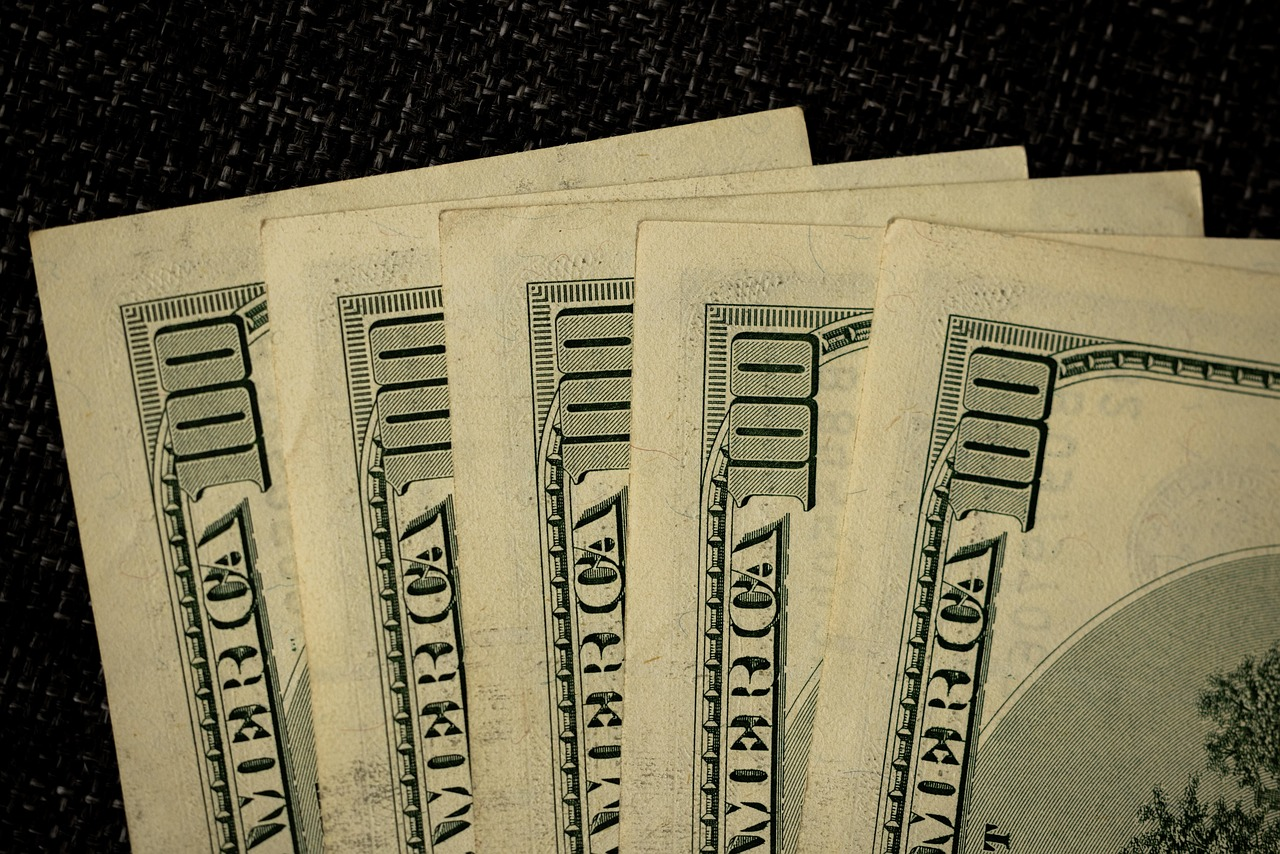

In [4]:
from IPython.display import Image

Image(filename = 'dollars.jpg')

<p style="text-align: justify; font-size: 18px; margin-left: 50px;">
     Salário é uma das palavras mais atraentes para um trabalhador, pois está ligado à capacidade de cobrir despesas essenciais e principalmente, manter estabilidade financeira. Para muitos indivíduos, o salário é fundamental para pagar as contas, evitar dívidas e alcançar uma qualidade de vida mais confortável.
<p style="text-align: justify; font-size: 18px; margin-left: 50px;">
     Neste contexto, analisar os salários dos funcionários de uma empresa se torna fundamental para compreender a distribuição salarial, identificar possíveis desigualdades e proporcionar medidas interessantes para a empresa.
</p>      

## Algumas questões a serem refletidas: 


1. **Ano de experiência influencia no salário?**
2. **Existe igualdade salarial entre os gêneros?**
3. **Há um retorno significativo no salário para níveis mais altos de educação?**
4. **Encontre a média, mediana, máximo e mínimo dos salários.**
5. **Pessoas mais jovens com alto nível educacional ganham mais do que mais velhos com menos estudo?**
6. **Qual o salário mais comum dentro da empresa?**


## Fonte do database:

<p>Kaggle: <a href="https://www.kaggle.com/datasets/mohithsairamreddy/salary-data" target="_blank">Salary_Data</a></p>


## Importação das bibliotecas:


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Descobrindo os 5 primeiros: 

In [13]:
import pandas as pd
salary = pd.read_excel('salários.xlsx')
print(salary.head())

   Age  Gender Education Level          Job Title  Years of Experience  \
0   32    Male        Bachelor  Software Engineer                  5.0   
1   28  Female         Masters       Data Analyst                  3.0   
2   45    Male             PhD     Senior Manager                 15.0   
3   36  Female        Bachelor    Sales Associate                  7.0   
4   52    Male         Masters           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   Para descobrir os 5 primeiros, foi utilizado o comando df.head() e eles apareceram em ordem crescente. 

## Os 5 Últimos: 

In [15]:
print(salary.tail())

      Age  Gender Education Level              Job Title  Years of Experience  \
6697   49  Female             PhD  Director of Marketing                 20.0   
6698   32    Male     High School        Sales Associate                  3.0   
6699   30  Female        Bachelor      Financial Manager                  4.0   
6700   46    Male         Masters      Marketing Manager                 14.0   
6701   26  Female     High School        Sales Executive                  1.0   

        Salary  
6697  200000.0  
6698   50000.0  
6699   55000.0  
6700  140000.0  
6701   35000.0  


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
 Para descobrir os 5 últimos do arquivo, foi utilizado o comando df.tail().

## Info das Colunas: 

In [17]:
print(salary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   int64  
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.3+ KB
None


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   Para descobrir as informações das colunas, foi aplicado o comando df.info(). Este comando mostra o número de colunas do arquivo, dtype e se todas colunas tem algum valor nulo ou não nulo.
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">  
   Neste caso, temos 6 colunas ao total com 6702 registros com as colunas "Age", "Gender" e "Job Title" sem valores nulos, pois as colunas "Education Level", "Years of Experience" e "Salary" contém valores nulos. 

## Formato do Dataframe: 

In [19]:
print(salary.shape)

(6702, 6)


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   A utilidade do comando .shape é mostrar a quantidade de linhas e colunas. No caso do arquivo, existem 6702 linhas e 6 colunas. 

## Descrição das Medidas Estatísticas: 

In [21]:
print(salary.describe())

               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.119534  115326.964771
std       7.614633             6.058979   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Para saber mais sobre a descrição das medidas estatísticas, o comando df.describe() é o mais adequado para isso. Analisando o arquivo, percebemos que as colunas destacadas são "Age", "Years of Experience" e "Salary". Por que essas 3 colunas? A resposta é que as 3 são colunas com "registros" numéricos enquanto as restantes são texto.
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Por exemplo, analisando a coluna "Age", ela tem 6702 "registros" (count), com média 33.6208 (mean), desvio padrão sendo 7.6146 (std), mínimo sendo 21 e máximo, 62. 25% ou primeiro quartil é 28, 50% ou mediana é 32 e 75% ou terceiro quartil é 38. E o raciocínio analisado para a coluna "Age" é o mesmo para as outras colunas. 

## Para Identificar Se Existe Algum Valor "NULL": 

In [23]:
print(salary.isnull())

        Age  Gender  Education Level  Job Title  Years of Experience  Salary
0     False   False            False      False                False   False
1     False   False            False      False                False   False
2     False   False            False      False                False   False
3     False   False            False      False                False   False
4     False   False            False      False                False   False
...     ...     ...              ...        ...                  ...     ...
6697  False   False            False      False                False   False
6698  False   False            False      False                False   False
6699  False   False            False      False                False   False
6700  False   False            False      False                False   False
6701  False   False            False      False                False   False

[6702 rows x 6 columns]


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   Para encontrar valores "NULL", foi utilizado o comando df.isnull(). No caso do arquivo, foi encontrado valores ausentes como evidenciado no info das colunas, entretanto, nesta parte, foca nos 5 primeiros e no 5 últimos "registros" do arquivo. Então, não foi encontrado nenhum valor ausente nesta parte mostrada. 

## Os 5 Funcionários Mais Novos: 

In [25]:
import pandas as pd
print(salary.sort_values('Age', ascending=True))

      Age  Gender Education Level                    Job Title  \
4986   21  Female     High School  Junior Sales Representative   
5120   21  Female     High School  Junior Sales Representative   
5107   21  Female     High School  Junior Sales Representative   
5094   21  Female     High School  Junior Sales Representative   
4882   21  Female     High School  Junior Sales Representative   
...   ...     ...             ...                          ...   
1256   62    Male             PhD    Software Engineer Manager   
1234   62    Male             PhD    Software Engineer Manager   
1223   62    Male             PhD    Software Engineer Manager   
1302   62    Male             PhD    Software Engineer Manager   
1303   62    Male             PhD    Software Engineer Manager   

      Years of Experience    Salary  
4986                  0.0   25000.0  
5120                  0.0   25000.0  
5107                  0.0   25000.0  
5094                  0.0   25000.0  
4882             

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Analisemos os 5 funcionários mais novos da empresa. Podemos observar que na verdade são 5 funcionárias e todas elas tem algumas características em comum como terem a mesma idade (21 anos), o nível educacional delas no máximo é Ensino Médio e elas trabalham como representante de vendas júnior. Também, elas não tem anos de experiência de trabalho e o salário delas é 25000 dólares. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Pela análise, é possível deduzir que as funcionárias mais novas tem 21 anos, com Ensino Médio completo e o salário de representante de vendas júnior é de 25000 dólares. 

## Os 5 Funcionários Mais Velhos: 

In [27]:
print(salary.sort_values('Age', ascending = False))

      Age  Gender Education Level                    Job Title  \
1303   62    Male             PhD    Software Engineer Manager   
1302   62    Male             PhD    Software Engineer Manager   
1256   62    Male             PhD    Software Engineer Manager   
1223   62    Male             PhD    Software Engineer Manager   
1234   62    Male             PhD    Software Engineer Manager   
...   ...     ...             ...                          ...   
5094   21  Female     High School  Junior Sales Representative   
5081   21  Female     High School  Junior Sales Representative   
5042   21  Female     High School  Junior Sales Representative   
4895   21  Female     High School  Junior Sales Representative   
4960   21  Female     High School  Junior Sales Representative   

      Years of Experience    Salary  
1303                 19.0  200000.0  
1302                 20.0  200000.0  
1256                 19.0  200000.0  
1223                 19.0  200000.0  
1234             

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
     Em relação aos 5 funcionários mais velhos da empresa, também todos tem algumas características em comum. Eles tem 62 anos, são homens, tem doutorado e trabalham como gerentes de engenharia de software. Pela análise, determinamos que os funcionários mais velhos tem 62 anos, recebem 200000 dólares e o ano de experiência entre 19 e 20 anos. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Alguns questionamentos os quais seria possível refletir são: Anos de experiência de trabalho e ter um nível educacional alto influenciam no salário? Isso será analisado mais adiante envolvendo outros elementos. 

## Os Funcionários Com Menos Experiência de Trabalho: 

In [29]:
print(salary.sort_values('Years of Experience', ascending = True))

      Age  Gender Education Level                    Job Title  \
5120   21  Female     High School  Junior Sales Representative   
5959   24  Female     High School                 Receptionist   
2854   23    Male             PhD    Software Engineer Manager   
5671   24  Female     High School                 Receptionist   
4973   21  Female     High School  Junior Sales Representative   
...   ...     ...             ...                          ...   
2474   60  Female             PhD    Software Engineer Manager   
2479   57  Female             PhD    Software Engineer Manager   
2499   60  Female             PhD    Software Engineer Manager   
2419   60  Female             PhD    Software Engineer Manager   
5245   26  Female        Bachelor                     Social M   

      Years of Experience    Salary  
5120                  0.0   25000.0  
5959                  0.0   25000.0  
2854                  0.0   52779.0  
5671                  0.0   25000.0  
4973             

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
Uma pequena análise interessante é a funcionária 5245, pois é a única que não mostrou anos de experiência e o salário. Possivelmente, poderíamos deduzir que ela foi recentemente contratada e por isso que os dados dela estão incompletos em comparação com os outros funcionários. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
Outra possibilidade seria o erro no cadastro ou ela poderia ter assumido outro cargo e inclusive, existe a chance dela ser uma funcionária transferida que trabalhava em uma outra unidade da empresa. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
Um detalhe que chamou atenção para mim é o funcionário 2854 de 23 anos. Ele tem doutorado e trabalha como gerente de engenharia de software e ele não tem anos de experiência de trabalho. Qual uma possibilidade plausível para isso? Uma possibilidade é ele ter se dedicado muito a pós-graduação e quando ele terminou o doutorado (provavelmente bem recente), ele entrou na empresa e ganha uma remuneração generosa de 52779 dólares, a qual indica no caso dele que ter um nível educacional "alto" influencia muito no salário.
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
Os 5 funcionários destacados são novos, as mulheres tem Ensino Médio e duas dela trabalham como recepcionista e duas como representante de vendas júnior e como mencionei, o funcionário 2854 é o que chamou mais a minha atenção. 

## Os Funcionários Com Mais Experiência de Trabalho: 

In [32]:
print(salary.sort_values('Years of Experience', ascending = False))

      Age  Gender Education Level                  Job Title  \
2419   60  Female             PhD  Software Engineer Manager   
2499   60  Female             PhD  Software Engineer Manager   
2394   60  Female             PhD  Software Engineer Manager   
2399   57  Female             PhD  Software Engineer Manager   
2513   57  Female         Masters        Full Stack Engineer   
...   ...     ...             ...                        ...   
5315   23  Female     High School               Receptionist   
5859   24  Female     High School               Receptionist   
2948   23    Male             PhD  Software Engineer Manager   
6140   24    Male     High School            Delivery Driver   
5245   26  Female        Bachelor                   Social M   

      Years of Experience    Salary  
2419                 34.0  188651.0  
2499                 34.0  188651.0  
2394                 33.0  179180.0  
2399                 33.0  191790.0  
2513                 33.0  188232.0  
...

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   Analisando os funcionários com mais experiência, podemos detectar que todas são mulheres e duas delas tem 57 anos enquanto restante, 60 anos. As primeiras quatro mulheres do arquivo já são doutoras com mesmo cargo: Gerente de Engenharia de Software enquanto a quinta funcionária tem mestrado e ela é Engenheira Full Stack. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   Vamos focar nos anos de experiência e no salário. Percebemos que três funcionárias tem 33 anos de experiência enquanto as duas primeiras, 34. O que chama mais atenção é no salário: as funcionárias 2419 e 2499 recebem o mesmo salário. A terceira funcionária recebe pouco menos em comparação com as duas funcionárias e provavelmente o motivo seria anos de experiência. A funcionária 2399 é a que interessou mais para mim na análise: das 5 funcionárias mostradas, é ela quem recebe mais apesar de ser 3 anos mais nova em comparação com as outras mulheres, e ela tem 33 anos de experiência enquanto as outras duas acima dela tem 34. O que eu posso imaginar é a funcionária 2399 ter recebido aumento do chefe. 

## Os Funcionários que Ganham Mais: 

In [34]:
print(salary.sort_values('Salary', ascending = False))

      Age  Gender Education Level                           Job Title  \
83     52    Male             PhD            Chief Technology Officer   
30     50    Male        Bachelor                                 CEO   
4999   45    Male        Bachelor                   Financial Manager   
4304   51    Male             PhD                      Data Scientist   
4364   51    Male             PhD                      Data Scientist   
...   ...     ...             ...                                 ...   
4631   31  Female        Bachelor               Junior HR Coordinator   
258    29    Male        Bachelor  Junior Business Operations Analyst   
3134   31    Male         Masters                 Full Stack Engineer   
5245   26  Female        Bachelor                            Social M   
6453   36    Male        Bachelor                      Sales Director   

      Years of Experience    Salary  
83                   24.0  250000.0  
30                   25.0  250000.0  
4999     

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
     Analisando os 5 primeiros, todos são homens com maioria sendo mais de 50 anos e o mais novo, 45 anos. Três deles tem doutorado e dois deles, graduação. Os três primeiros funcionários recebem 250000 dólares enquanto os outros dois recebem 240000 e são cientistas de dados. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
     Apesar do funcionário 4999 ser o mais novo dos cinco e ter menos experiência em comparação com os outros 4, ele recebe o mesmo salário dos funcionários 83 e 30 e por meio desta análise, foi possível perceber que um cargo tem influência maior em comparação com anos de experiência ou nível educacional. E o funcionário 30 que é CEO e tem graduação? Ele recebe mais que muitos com mestrado e doutorado. 

## Os Funcionários Que Recebem Menos: 

In [36]:
print(salary.sort_values('Salary', ascending = True))

      Age  Gender Education Level                           Job Title  \
258    29    Male        Bachelor  Junior Business Operations Analyst   
4631   31  Female        Bachelor               Junior HR Coordinator   
1888   25  Female        Bachelor                 Front end Developer   
2652   23    Male             PhD           Software Engineer Manager   
4921   21  Female     High School         Junior Sales Representative   
...   ...     ...             ...                                 ...   
83     52    Male             PhD            Chief Technology Officer   
4999   45    Male        Bachelor                   Financial Manager   
3134   31    Male         Masters                 Full Stack Engineer   
5245   26  Female        Bachelor                            Social M   
6453   36    Male        Bachelor                      Sales Director   

      Years of Experience    Salary  
258                  15.0     350.0  
4631                  4.0     500.0  
1888     

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Em relação aos funcionários que recebem menos, a maioria é jovem, tem mais mulheres e três com graduação e uma com ensino médio completo. O que me chamou mais atenção foi o 2652. Ele tem doutorado e a funcionária que tem ensino médio completo recebe mais que ele de acordo com os dados. Entretanto, no arquivo, existem alguns funcionários com as mesmas características e o mesmo cargo recebendo mais que ele. Será que foi um erro do sistema por parte da empresa? Possivelmente sim, pois ele deveria estar recebendo o mesmo salário que seus colegas de trabalho. 

## Contagem dos Gêneros (Sem Gráfico):

In [38]:
print(salary.Gender.value_counts())

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Somando tudo, temos 6702 funcionários sendo homens na sua maioria. Transformando em porcentagem, temos homens: 54.81%, mulheres: 44.97% e outros: aproximadamente 0.2%. 
<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Analisemos os "outros": E quem seria os "outros" da empresa? Seniores ou funcionários que não se identificam com nenhum dos gêneros? 

## Contagem dos Cargos (Sem Gráfico): 

In [40]:
print(salary["Job Title"].value_counts())

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
     Os cargos com maiores quantidades são relacionados a tecnologia. Então, é possível deduzir que é uma empresa voltada para o setor de tecnologia, uma consultoria ou até uma startup. 

## Contagem dos Níveis Educacionais (Sem Gráfico):

In [42]:
print(salary["Education Level"].value_counts())

Education Level
Bachelor       3023
Masters        1861
PhD            1368
High School     448
phD               1
Name: count, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    A maioria dos funcionários tem graduação, em seguida aparecem mestrado e doutorado, respectivamente. Por último, Ensino Médio. Porcentagem dos níveis educacionais: Graduação: 45.11%, Mestrado: 27.77%, Doutorado: 20.43% e Ensino Médio: 6.69%. As contagens mostram a valorização de ter uma graduação pelo menos. 

## Contagem de Anos de Experiência (Sem Gráfico): 

In [44]:
print(salary["Years of Experience"].value_counts())

Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     439
8.0     426
5.0     400
9.0     380
7.0     353
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    141
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
29.0     12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
Name: count, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    A maioria dos funcionários estão entre 2 a 6 anos de experiência de trabalho enquanto os mais experientes são a minoria. Poderíamos pensar na empresa valorizar jovens e enxergá-los como futuro da empresa. 

### Contagem das Idades dos Funcionários: 

In [46]:
print(salary.Age.value_counts())

Age
27    517
30    449
29    444
28    429
33    398
26    394
31    365
32    351
34    309
25    284
36    282
24    240
35    200
42    176
43    158
39    158
37    156
38    149
45    144
41    129
44    126
23    104
46    102
48     98
40     92
49     91
50     88
54     68
47     47
51     30
52     29
21     18
55     16
22     15
56     11
57      9
53      7
58      7
62      5
60      5
61      2
Name: count, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   A maioria dos funcionários são consideravelmente novos e com certa experiência. Na empresa, não há tantos empregados com idade mais avançada. 

## Contagem dos Salários (Sem Gráfico): 

In [48]:
print(salary.Salary.value_counts())

Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
60000.0     231
           ... 
150534.0      1
68732.0       1
187951.0      1
137336.0      1
178284.0      1
Name: count, Length: 444, dtype: int64


<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
  A maioria ganha salário superior a 100000 dólares. 

## Contagem dos gêneros: 

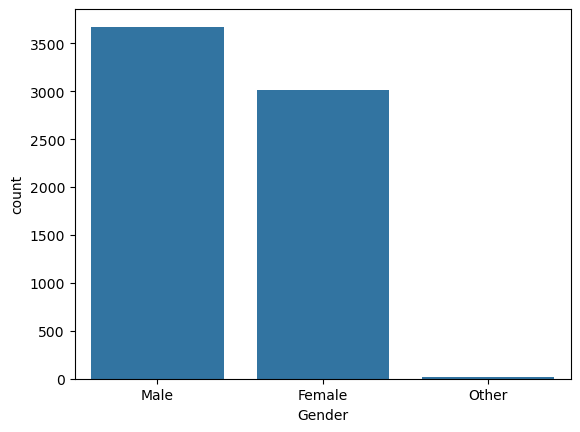

In [50]:
import seaborn as sns
sns.countplot(x = 'Gender', data = salary)
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   No gráfico, a quantidade de homens é maior em comparação com as mulheres e "outros". 

## Contagem dos Níveis Educacionais:

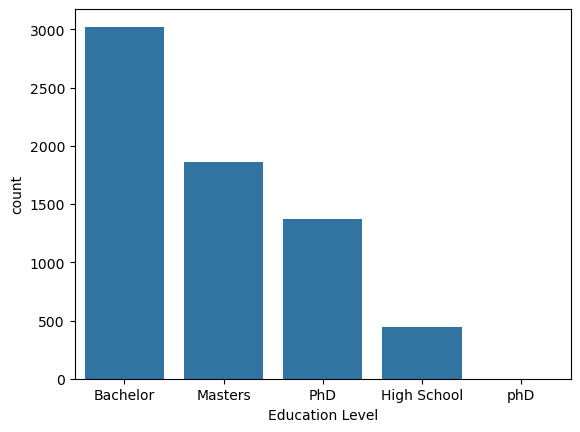

In [52]:
sns.countplot(x = 'Education Level', data = salary)
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    A maioria dos funcionários são graduados

### Relação Anos de Experiência x Salário

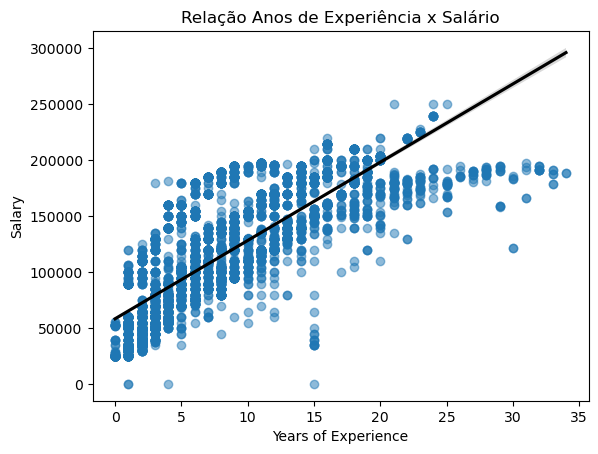

In [54]:
sns.regplot(x = "Years of Experience", y = "Salary", data = salary, scatter_kws={'alpha':0.5}, line_kws={"color":"black"})
plt.title("Relação Anos de Experiência x Salário")
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   O gráfico é uma relação de Anos de Experiência por Salário. percebemos uma sobreposição das variáveis e a linha de tendência está forte e positiva. Em palavras mais "sofisticadas", há correlação forte positiva e isso monstra que anos de experiência pode influenciar em maior salário. Só que o maior salário está entre 20 a 25 anos de experiência e quem tem aproximadamente entre 30 a 35 anos de experiência ganha na faixa de 150000 dólares. Então, apesar de anos de experiência influenciar, parece que o cargo tem influência maior. 

## Histograma: Anos de Experiência

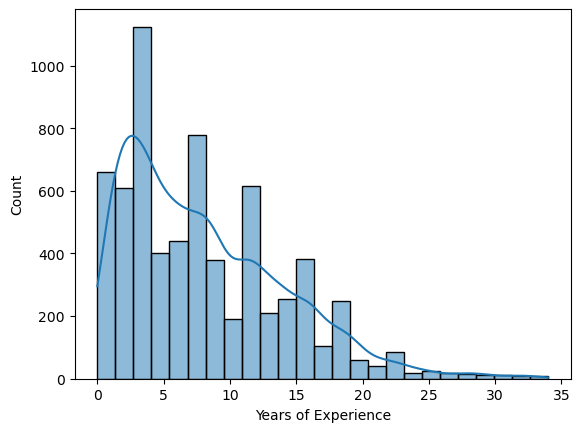

In [56]:
sns.histplot(x = "Years of Experience", data = salary, kde = True, bins = 25)
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    No histograma, a maioria dos funcionários tem entre 0 a 10 anos de experiência e não há abundância de funcionários mais experientes. Isso poderia indicar que a empresa tem histórico de rotatividade de funcionários? Ou que prioriza mais funcionários jovens com intenção de lapidá-los à empresa? 

## Histograma: Salários

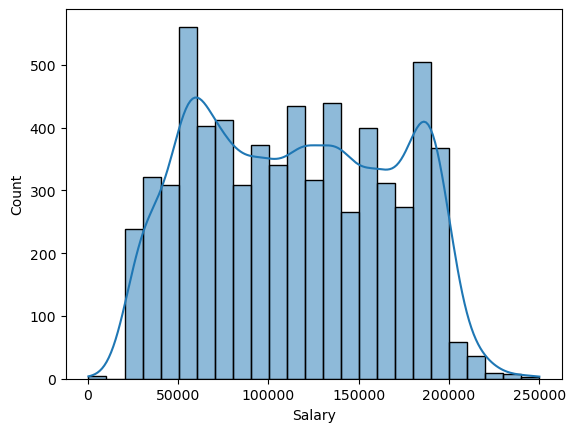

In [58]:
sns.histplot(x = "Salary", data = salary, kde = True, bins = 25)
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   A maioria dos funcionários recebem mais que 50000 dólares. 

## Histograma: Idade dos Funcionários

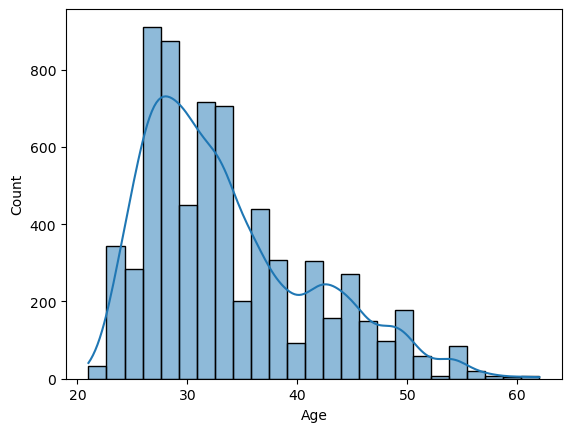

In [60]:
sns.histplot(x = "Age", data = salary, kde = True, bins = 25)
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   A maioria dos funcionários estão na casa dos 25 para mais de 30. Funcionários que são consideravelmente jovens e com certa experiência de trabalho. 

## Relação Salário x Gênero

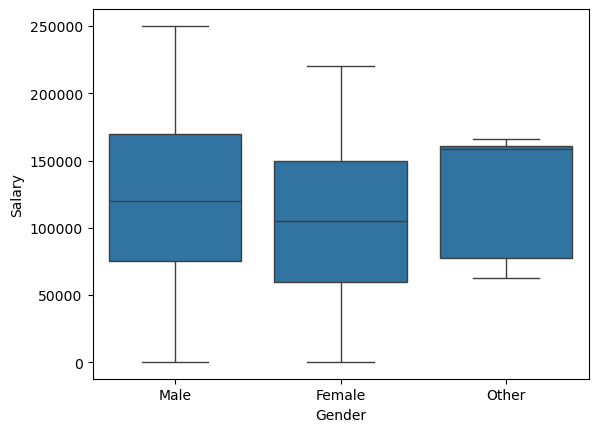

In [62]:
sns.boxplot(data=salary, x="Gender", y="Salary")
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
   No gráfico boxplot, vamos analisar os gêneros. Sim, é possível determinar uma desigualdade salarial: "outros" são os que recebem mais por conta deles serem menos em quantidade de funcionários em comparação com os homens e mulheres. As funcionárias recebem menos que os funcionários.  

## Relação Salário x Níveis de Educação

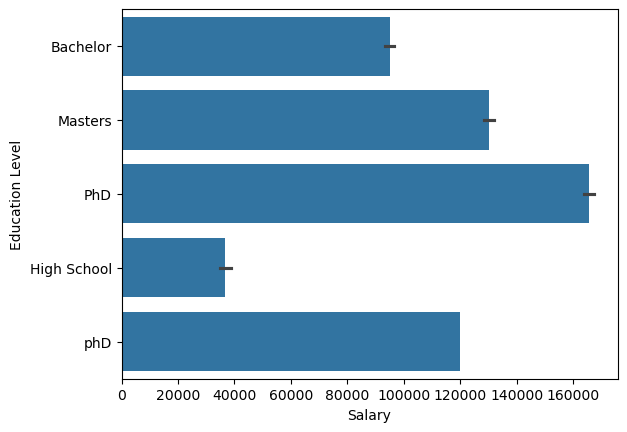

In [64]:
sns.barplot(x = "Salary", y = "Education Level", data = salary, estimator = "mean")
plt.show()

<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    Em relação aos níveis educacionais, percebemos que quanto maior o nível educacional, o salário é maior. 

## Relação Idade x Salário (Com Critério Sendo Nível Educacional)

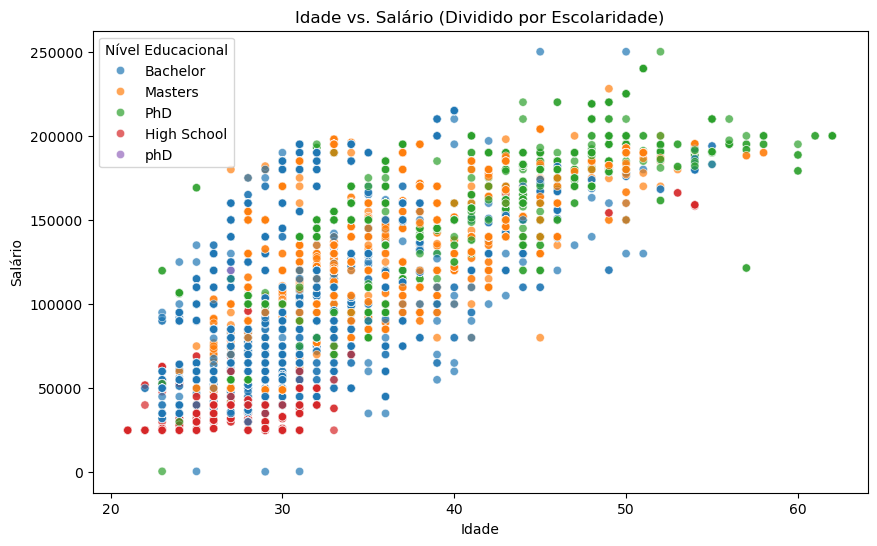

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = "Age", y = "Salary", data = salary, hue="Education Level", alpha=0.7)

plt.title("Idade vs. Salário (Dividido por Escolaridade)")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.legend(title="Nível Educacional")
plt.show()



<p style="text-align: justify; font-size: 16px; margin-left: 50px;">
    O gráfico de dispersão é sobre Idade x Salário com Legenda para os níveis educacionais. Podemos ver que o pessoal com Ensino Médio recebem menos enquanto os funcionários com graduação completa estão levemente mais elevados que o pessoal com Ensino Médio. Um detalhe importante é alguns com graduação receberem bem mais que o pessoal com mestrado ou doutorado. Então, como descrito em outras análises, cargo influencia mais que nível educacional 